In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
from matplotlib.legend import Legend

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
def load_network_from_csv(filepath):
    """Load a network from a CSV file of edges."""
    return nx.read_edgelist(filepath, create_using=nx.DiGraph)

In [5]:
network = load_network_from_csv("network.csv")

## Custom Visualization

In [10]:
tiers = {
    'Context B': ['Age', 'Sexe'],
    'B': ['aedu', 'asmokstat', 'AIPMETO2', 'aauditsc', 'aIRSsum9', 'abaiscal', 'aids', 'acidep09', 'amet_syn2', 'ams_waist', 'ams_hpt', 'ams_trig2', 'ams_hdl2', 'ams_gluc2', 'atri_med', 'ahdl_med', 'asbp_med', 'adbp_med', 'agluc_med', 'ahsCRP', 'aIL6', 'aApoB', 'aHDL_C', 'aTotFA', 'aSerum_TG', 'aGp', 'aIle'],
    'Context FU': ['eage', 'sex'],
    'FU': ['eipmeto2', 'eauditsc', 'eIRSsum9', 'ebaiscal', 'eids', 'ecidep09', 'emet_syn2', 'ems_waist', 'ems_hpt', 'ems_trig2', 'ems_hdl2', 'ems_gluc2',
    'etri_med', 'ehdl_med', 'esbp_med', 'edbp_med', 'egluc_med', 'eApoB', 'eHDLC', 'eTotFA', 'eSerumTG', 'eGp', 'eIle', 'eHSCRP', 'eIL6',]
}

In [6]:
renamed_labels = {
    'Age': 'Age', 'eage': 'Age',
    'Sexe': 'Gender', 'sex': 'Gender',
    'aedu': 'Education',
    'asmokstat': 'Smoking status',
    'aauditsc': 'Alcohol consumption', 'eauditsc': 'Alcohol consumption',
    'AIPMETO2': 'Physical activity', 'eipmeto2': 'Physical activity',
    'aIRSsum9': 'Sleep pattern', 'eIRSsum9': 'Sleep pattern',
    'acidep09': 'Major depression', 'ecidep09': 'Major depression',
    'amet_syn2': 'MetS', 'emet_syn2': 'MetS',
    'ams_waist': 'WC', 'ems_waist': 'WC',
    'ams_hpt': 'Hypertension', 'ems_hpt': 'Hypertension',
    'ams_trig2': 'Hypertriglyceridemia', 'ems_trig2': 'Hypertriglyceridemia',
    'ams_hdl2': 'Low HDL cholesterol', 'ems_hdl2': 'Low HDL cholesterol',
    'ams_gluc2': 'Hyperglycemia', 'ems_gluc2': 'Hyperglycemia',
    'atri_med': 'TG', 'etri_med': 'TG',
    'ahdl_med': 'HDL', 'ehdl_med': 'HDL',
    'asbp_med': 'Systolic BP', 'esbp_med': 'Systolic BP',
    'adbp_med': 'Diastolic BP', 'edbp_med': 'Diastolic BP',
    'agluc_med': 'Glucose', 'egluc_med': 'Glucose',
    'ahsCRP': 'hs-CRP', 'eHSCRP': 'hs-CRP',
    'aIL6': 'IL-6', 'eIL6': 'IL-6',
    'aApoB': 'ApoB', 'eApoB': 'ApoB',
    'aHDL_C': 'HDLC', 'eHDLC': 'HDLC',
    'aTotFA': 'Total FA', 'eTotFA': 'Total FA',
    'aSerum_TG': 'Serum TG', 'eSerumTG': 'Serum TG',
    'aGp': 'AGP', 'eGp': 'AGP',
    'aIle': 'Ile', 'eIle': 'Ile',
    'abaiscal': 'Anxiety', 'ebaiscal': 'Anxiety',
    'aids': 'Depression severity', 'eids': 'Depression severity'
}

# Node color map
color_map = {
    'background variables': '#ADD7F6',
    'conditional variables': '#2667FF',
    'metabolites': '#FFD700',
    'intermediate variables': '#FF6347',
    'diagnostic variables': '#90EE90'
}

variable_groups = {
    'background variables': {'Gender', 'Age'},
    'conditional variables': {'Smoking status', 'Physical activity', 'Education', 'Alcohol consumption', 'Sleep pattern', 'Anxiety', 'Depression severity'},
    'metabolites': {'ApoB', 'Total FA', 'Serum TG', 'AGP', 'Ile', 'HDLC'},
    'intermediate variables': {'TG', 'WC', 'HDL', 'BP', 'Glucose'},  # default group
    'diagnostic variables': {'Major depression', 'MetS'}
}

# Automatically categorize all variables into the intermediate group if not listed
all_variables = set(renamed_labels.values()) 
for group, vars in variable_groups.items():
    if group != 'intermediate variables':  
        all_variables -= vars
variable_groups['intermediate variables'].update(all_variables)  # Add uncategorized to intermediate

baseline_variables = {'Age', 'Sexe', 'aedu', 'asmokstat', 'aauditsc', 'AIPMETO2', 'aIRSsum9', 'aids', 'abaiscal', 'acidep09', 'amet_syn2', 'ams_waist', 'ams_hpt', 'ams_trig2', 'ams_hdl2', 'ams_gluc2', 'atri_med', 'ahdl_med', 'asbp_med', 'adbp_med', 'agluc_med', 'ahsCRP', 'aIL6', 'aApoB', 'aHDL_C', 'aTotFA', 'aSerum_TG', 'aGp', 'aIle'}
follow_up_variables = {'eage', 'sex', 'eipmeto2', 'eauditsc', 'eids', 'ebaiscal', 'eApoB', 'eHDLC', 'eTotFA', 'eSerumTG', 'eGp', 'eIle', 'ecidep09', 'eHSCRP', 'eIL6', 'eIRSsum9', 'ems_waist', 'ems_hpt', 'ems_trig2', 'ems_hdl2', 'ems_gluc2', 'emet_syn2', 'etri_med', 'ehdl_med', 'esbp_med', 'edbp_med', 'egluc_med'}

node_colors = [next(color_map[group] for group, vars in variable_groups.items() if renamed_labels[node] in vars) for node in network.nodes()]
node_shape_map = {}
for node in network.nodes():
    if node in baseline_variables:
        node_shape_map[node] = 's'
    elif node in follow_up_variables:
        node_shape_map[node] = 'o'
    else:
        node_shape_map[node] = 'o'

In [7]:
def layered_layout(network, tiers, max_nodes_per_line=8):
    positions = {}
    x_spacing = 100  # Horizontal space between nodes
    y_spacing = 200  # Vertical space between rows
    x_offset = 0
    y_offset = 0
    current_count = 0 

    # Filter nodes to include only those with at least one connection
    connected_nodes = [node for node in network.nodes() if network.degree(node) > 0]
    
    # Include nodes based on tiers but filter out unconnected nodes
    all_nodes = [node for tier_nodes in tiers.values() for node in tier_nodes if node in connected_nodes]

    for node in all_nodes:
        if current_count >= max_nodes_per_line:
            y_offset -= y_spacing  # move down to a new row
            x_offset = 0
            current_count = 0

        positions[node] = (x_offset, y_offset)
        x_offset += x_spacing  # move right for the next node
        current_count += 1

    return positions

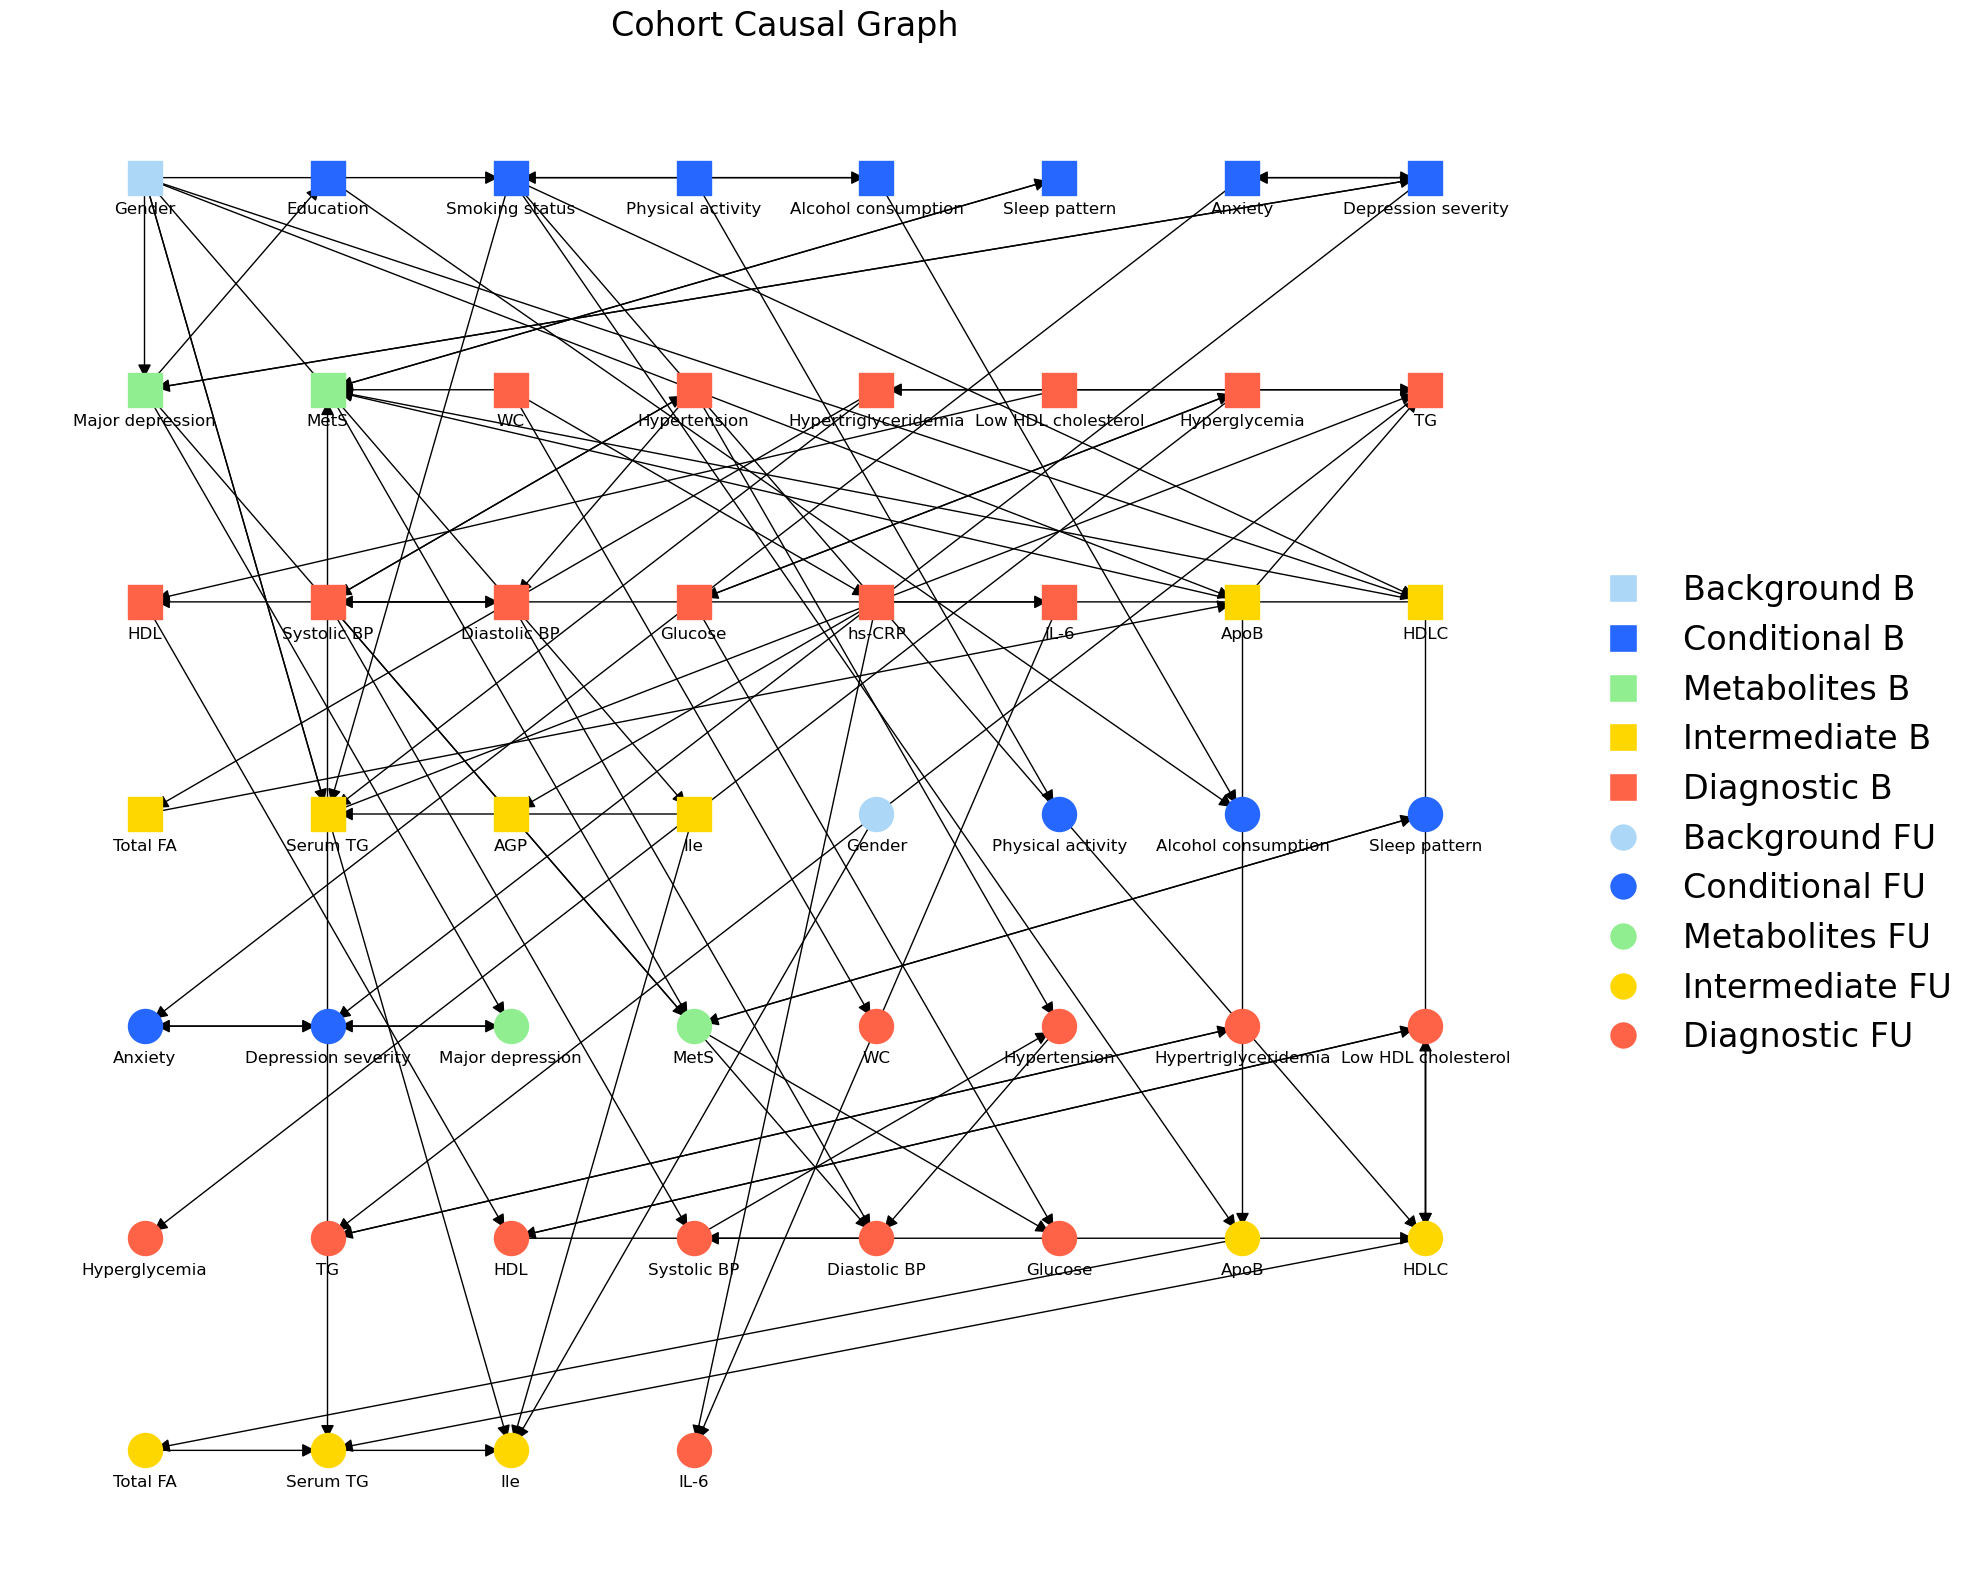

In [11]:
position = layered_layout(network, tiers)
label_positions = {node: (pos[0], pos[1] - 30) for node, pos in position.items() if node in position}
node_colors = {node: next(color_map[group] for group, vars in variable_groups.items() if renamed_labels[node] in vars) 
               for node in position}

group_color_map = {
    'background variables': '#ADD7F6',
    'conditional variables': '#2667FF',
    'metabolites': '#90EE90',
    'intermediate variables':'#FFD700',
    'diagnostic variables': '#FF6347'
}

node_shapes = {node: ('o' if node in follow_up_variables else 's') for node in position}

plt.figure(figsize=(20, 20))
for node in position:
    nx.draw_networkx_nodes(network, position, nodelist=[node], node_color=[node_colors[node]],
                           node_shape=node_shapes[node], node_size=600)
nx.draw_networkx_edges(network, position, arrows=True, arrowsize=20)
nx.draw_networkx_labels(network, label_positions, font_size=12, font_family='sans-serif',
                        labels={node: renamed_labels.get(node, node) for node in position})

# Legend
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Background B', markersize=20, markerfacecolor='#ADD7F6', lw=4),
    Line2D([0], [0], marker='s', color='w', label='Conditional B', markersize=20, markerfacecolor='#2667FF', lw=4),
    Line2D([0], [0], marker='s', color='w', label='Metabolites B', markersize=20, markerfacecolor='#90EE90', lw=4),
    Line2D([0], [0], marker='s', color='w', label='Intermediate B', markersize=20, markerfacecolor='#FFD700', lw=4),
    Line2D([0], [0], marker='s', color='w', label='Diagnostic B', markersize=20, markerfacecolor='#FF6347', lw=4),
    Line2D([0], [0], marker='o', color='w', label='Background FU', markersize=20, markerfacecolor='#ADD7F6', lw=4),
    Line2D([0], [0], marker='o', color='w', label='Conditional FU', markersize=20, markerfacecolor='#2667FF', lw=4),
    Line2D([0], [0], marker='o', color='w', label='Metabolites FU', markersize=20, markerfacecolor='#90EE90', lw=4),
    Line2D([0], [0], marker='o', color='w', label='Intermediate FU', markersize=20, markerfacecolor='#FFD700', lw=4),
    Line2D([0], [0], marker='o', color='w', label='Diagnostic FU', markersize=20, markerfacecolor='#FF6347', lw=4)
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=24)

plt.title('Cohort Causal Graph', fontsize=24)
plt.axis('off')
plt.show()